In [78]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [79]:
# Load your dataset here
# Replace this with your actual data loading code
# Example for Heart Disease dataset:
#df = pd.read_csv('heart_disease.csv')

# For this template, I'll create a simple example dataset
np.random.seed(42)
n = 200

# Create sample data (replace with your actual dataset)
'''data = {
    'age': np.random.normal(50, 15, n),
    'income': np.random.normal(50000, 20000, n),
    'education': np.random.choice(['High School', 'College', 'Graduate'], n),
    'target': np.random.choice([0, 1], n, p=[0.6, 0.4])
}

df = pd.DataFrame(data)
print(f"Dataset shape: {df.shape}")
df.head()''' 

col_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 
    'marital-status', 'occupation', 'relationship', 'race', 'sex', 
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/Users/Tanisha/Downloads/adult (1)/adult.data', header=None, names=col_names)

# Display the first few rows of the DataFrame
print(df.head())

np.random.seed(42)
n = 200

# Create sample data (replace with your actual dataset)
sample = df.sample(n=20, random_state=42)

sample.head()



   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,<=50K


In [80]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


=== DATASET OVERVIEW ===
Shape: (32561, 15)

Data types:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Missing values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Basic statistics:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


=== TARGET VARIABLE ===
Target distribution:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


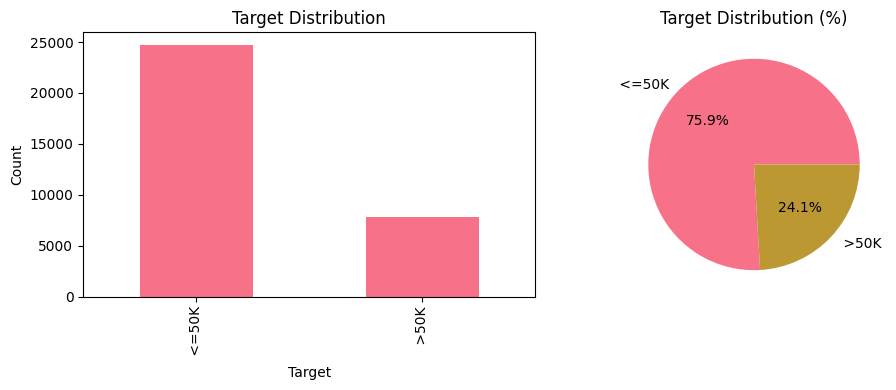

In [81]:
# Target variable analysis
print("=== TARGET VARIABLE ===")
target_counts = df['income'].value_counts()
print(f"Target distribution:")
print(target_counts)

# Visualize target distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
target_counts.plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Target Distribution (%)')

plt.tight_layout()
plt.show()


=== NUMERICAL VARIABLES ===
Numerical columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


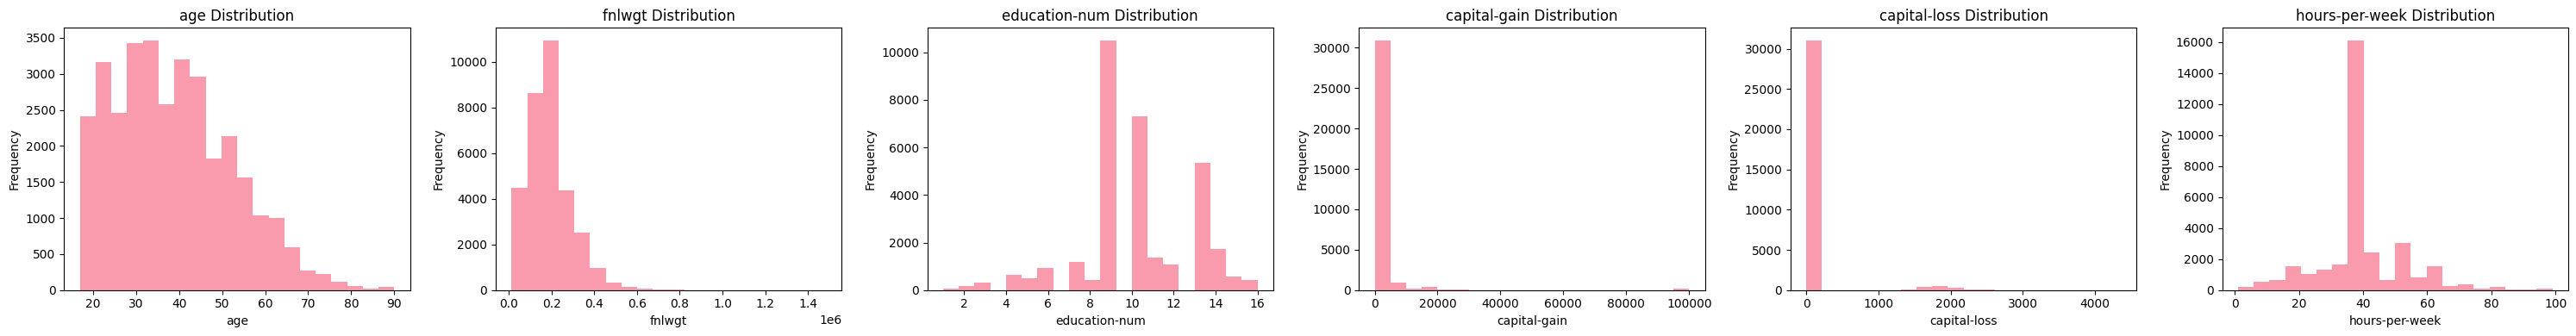

In [82]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

# Create histograms for numerical variables
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


=== CATEGORICAL VARIABLES ===
Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

workclass value counts:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


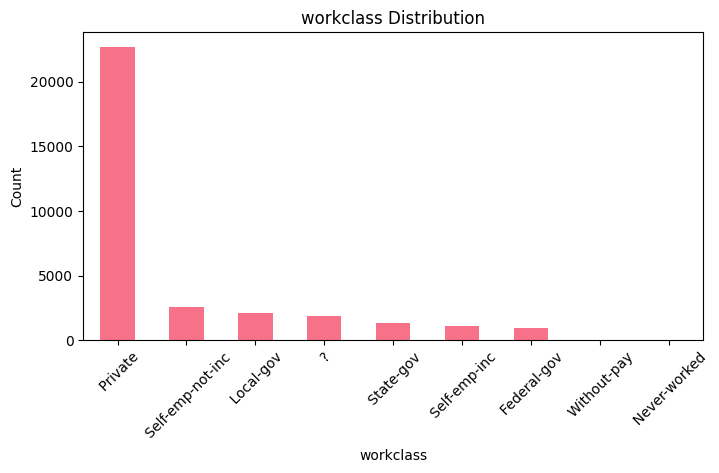


education value counts:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


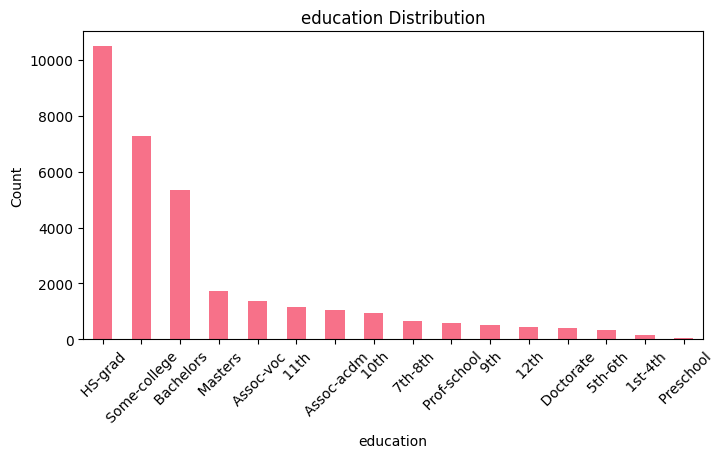


marital-status value counts:
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64


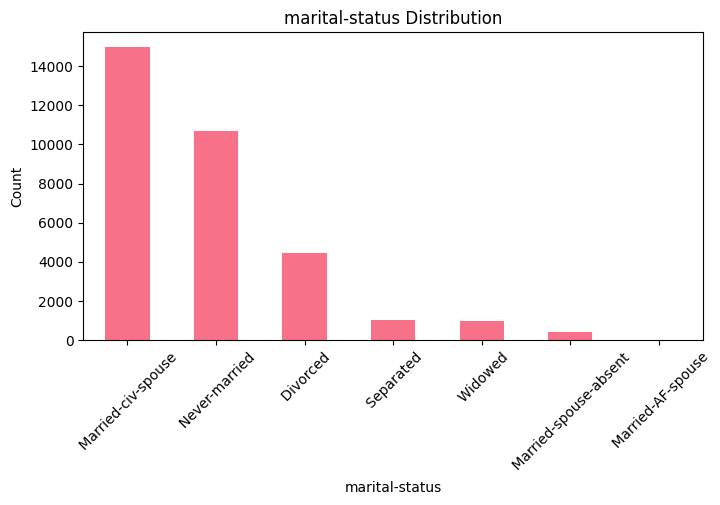


occupation value counts:
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


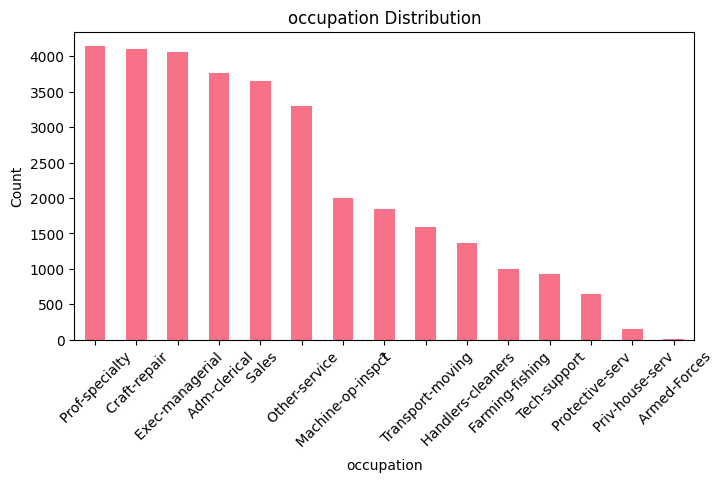


relationship value counts:
relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64


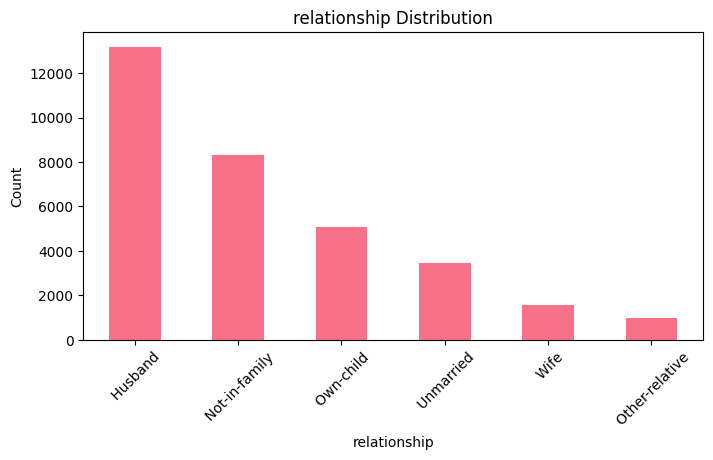


race value counts:
race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


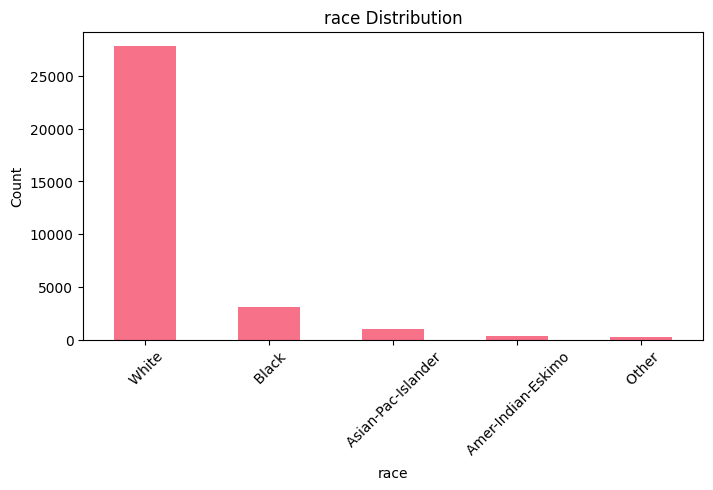


sex value counts:
sex
Male      21790
Female    10771
Name: count, dtype: int64


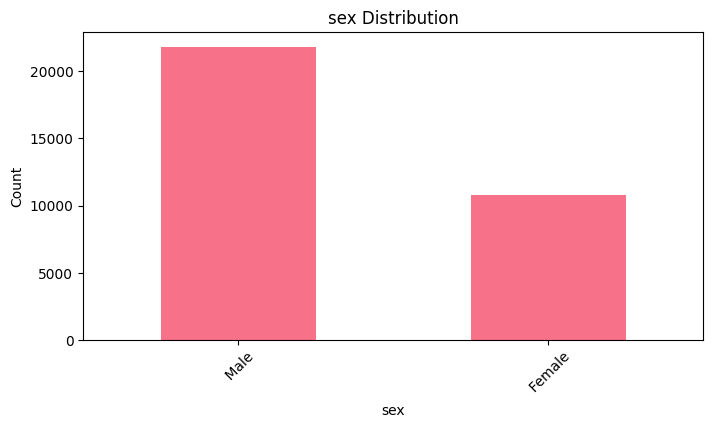


native-country value counts:
native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru               

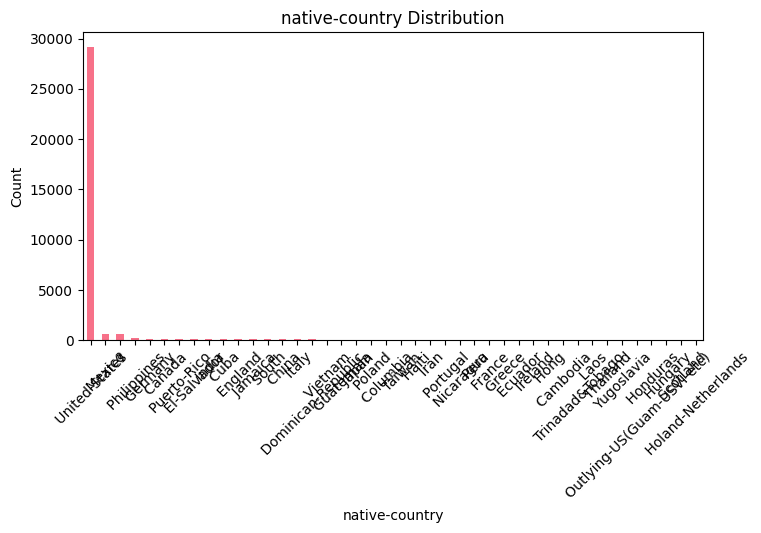


income value counts:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


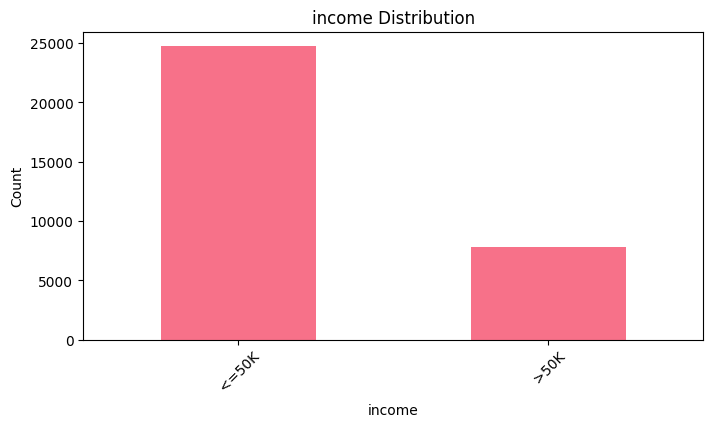

In [83]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    
    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


=== CORRELATION ANALYSIS ===


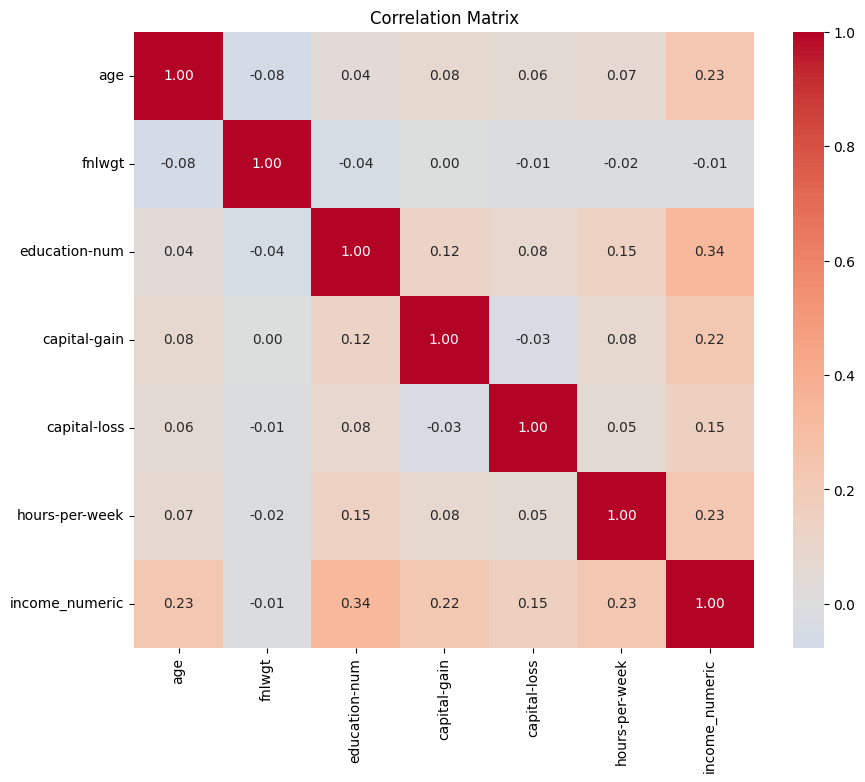


Correlations with target variable ('income_numeric'):
income_numeric    1.000000
education-num     0.335154
age               0.234037
hours-per-week    0.229689
capital-gain      0.223329
capital-loss      0.150526
fnlwgt           -0.009463
Name: income_numeric, dtype: float64


In [84]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")
correlation_matrix = df.corr(numeric_only=True)

'''plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Show correlations with target variable
if 'income' in df.columns:
    target_correlations = correlation_matrix['income'] #.sort_values(ascending=False)
    print("\nCorrelations with target variable:")
    print(target_correlations)'''

# Create a numeric version of the target variable ---
# Map '<=50K' to 0 and '>50K' to 1
df.dropna(subset=['income'], inplace=True)
df['income'] = df['income'].str.strip()
# Create the numeric version using the map
df['income_numeric'] = df['income'].map({'<=50K': 0, '>50K': 1})
# Drop the original 'income' column
df = df.drop(columns=['income'], axis=1)
correlation_matrix = df.corr(numeric_only=True)

# The heatmap will now also show the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Show correlations with the new numeric target variable
target_correlations = correlation_matrix['income_numeric'].sort_values(ascending=False)
print("\nCorrelations with target variable ('income_numeric'):")
print(target_correlations)

=== RELATIONSHIPS WITH TARGET ===


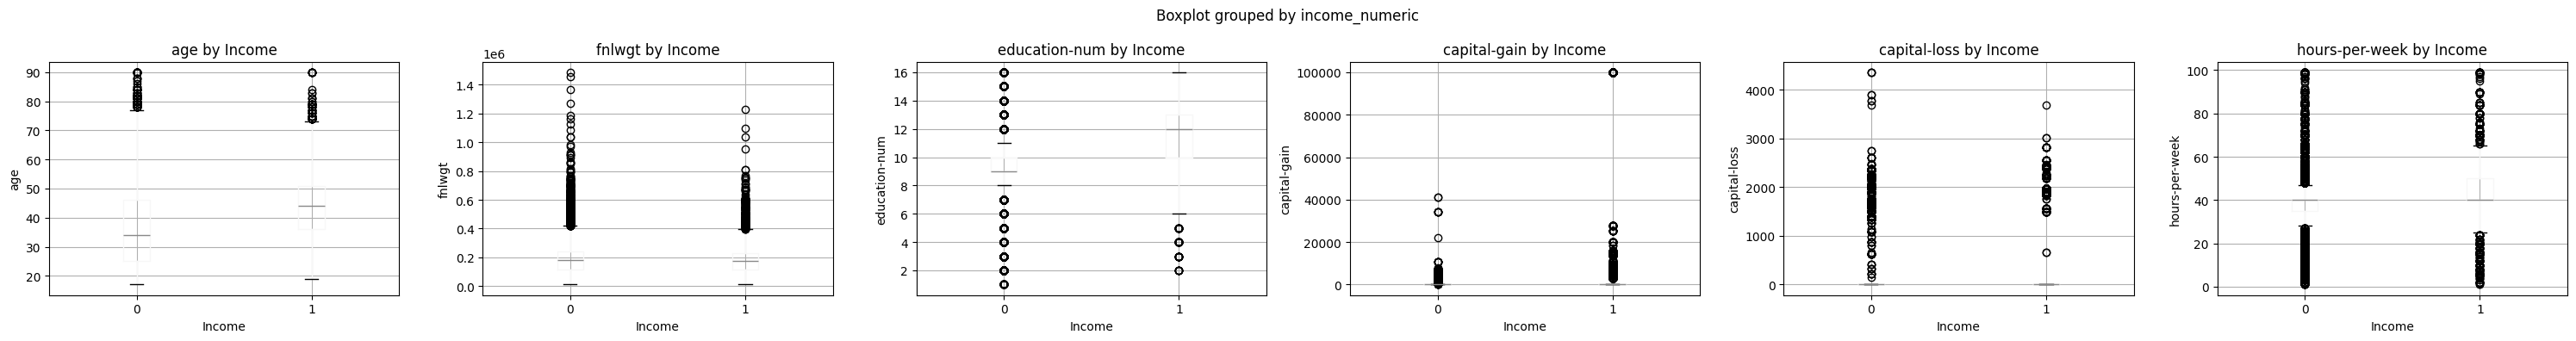


workclass vs Target:
income_numeric        0      1
workclass                     
?                 0.896  0.104
Federal-gov       0.614  0.386
Local-gov         0.705  0.295
Never-worked      1.000  0.000
Private           0.781  0.219
Self-emp-inc      0.443  0.557
Self-emp-not-inc  0.715  0.285
State-gov         0.728  0.272
Without-pay       1.000  0.000

education vs Target:
income_numeric      0      1
education                   
10th            0.934  0.066
11th            0.949  0.051
12th            0.924  0.076
1st-4th         0.964  0.036
5th-6th         0.952  0.048
7th-8th         0.938  0.062
9th             0.947  0.053
Assoc-acdm      0.752  0.248
Assoc-voc       0.739  0.261
Bachelors       0.585  0.415
Doctorate       0.259  0.741
HS-grad         0.840  0.160
Masters         0.443  0.557
Preschool       1.000  0.000
Prof-school     0.266  0.734
Some-college    0.810  0.190

marital-status vs Target:
income_numeric             0      1
marital-status                

In [85]:
# Relationship between variables and target
print("=== RELATIONSHIPS WITH TARGET ===")

# Box plots for numerical variables vs target
numerical_cols_no_target = [col for col in numerical_cols if col != 'income_numeric']

if len(numerical_cols_no_target) > 0:
    fig, axes = plt.subplots(1, len(numerical_cols_no_target), figsize=(5*len(numerical_cols_no_target), 4))
    if len(numerical_cols_no_target) == 1:
        axes = [axes]
    
    for i, col in enumerate(numerical_cols_no_target):
        df.boxplot(column=col, by='income_numeric', ax=axes[i])
        axes[i].set_title(f'{col} by Income')
        axes[i].set_xlabel('Income')
        axes[i].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

# Crosstabs for categorical variables vs income_numeric
for col in categorical_cols:
    if col != 'income':  # 'income' column no longer exists
        print(f"\n{col} vs Target:")
        crosstab = pd.crosstab(df[col], df['income_numeric'], normalize='index')
        print(crosstab.round(3))


## Hypothesis 1
**H1**: This hypothesis tests if the average number of hours worked per week is different for high-income earners compared to low-income earners.
- **Null Hypothesis (H0)**: There is no significant difference in the mean hours worked per week between individuals who earn >50K and those who earn <=50K.
- **Alternative Hypothesis (HA)**: The mean hours worked per week for individuals who earn >50K is significantly higher than for those who earn <=50K
- **Rationale**: Those who work longer hours would get paid more, if they are paid an hourly wage. Additionally, those who work longer hours often work in white collar job, and therefore also get paid more


## Hypothesis 2
**H2**: This hypothesis tests whether an individual's sex is associated with their income category. 
- **Null Hypothesis (H0)**: There is no significant association between an individual's sex and their income level. The two variables are independent.
- **Alternative Hypothesis (HA)**: There is a significant association between an individual's sex and their income level; they are not independent.
- **Rationale**: Its likely that males get paid more, just based on the research on the income gap between males and females

### Testing Hypothesis 1: This hypothesis tests if the average number of hours worked per week is different for high-income earners compared to low-income earners.

**Test Choice:** two sample t-test
- **Why appropriate:** we're looking at difference in means between 2 groups (those who earn <50k and those who earn >50k)

In [88]:
#Hypothesis testing 1: Using t-test for numerical variable vs target
print("=== HYPOTHESIS TESTING 1: HOURS PER WEEK vs INCOME ===")
#conduct a two sample t-test to compare the means of hours-per-week for the two income groups
high_income = df[df['income_numeric'] == 1]['hours-per-week']
low_income = df[df['income_numeric'] == 0]['hours-per-week']
t_stat, p_value = stats.ttest_ind(high_income, low_income, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_value}")
print("Based on the p-value, we reject the null hypothesis as 0 < 0.05.") 

=== HYPOTHESIS TESTING 1: HOURS PER WEEK vs INCOME ===
T-statistic: 42.583873499437956, P-value: 0.0
Based on the p-value, we reject the null hypothesis as 0 < 0.05.


### Testing Hypothesis 2: This hypothesis tests whether an individual's sex is associated with their income category.

**Test Choice:** Chi square test
- **Why appropriate:** we're examining the relationship between two categorical variables, and wether they are associated or not

In [89]:
#conduct a chi-square test to examine the association between sex and income
print("\n=== HYPOTHESIS TESTING 2: SEX vs INCOME ===")
contingency_table = pd.crosstab(df['sex'], df['income_numeric'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, P-value: {p}")
print("Based on the p-value, we reject the null hypothesis as 0 < 0.05.") 


=== HYPOTHESIS TESTING 2: SEX vs INCOME ===
Chi-square statistic: 1517.813409134445, P-value: 0.0
Based on the p-value, we reject the null hypothesis as 0 < 0.05.


## 5. Summary and Conclusions

### Key Findings from EDA:
1. There is an association between a person's sex and their income levels, and those who work more hours earn moree=
2. There is an association between age and income, perhaps because income increases with age peaking in early 50s. Additionally, there is a strong relationship between income and capital gain
3. Theres an interesting positive correlation between education and hourse per week, perhaps because those who are more educated naturally work higher paying jobs?

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | [two sample t-test] | [0] | [Significant] | [p value < alpha (0.05), so we reject the null] |
| **H2** | [Chi square test] | [0] | [Significant] | [p value < alpha (0.05), so we reject the null] |

### Key Insights:
- Individuals who earn over $50K are, on average, significantly older than those who earn less & there a statistically significant association between an individual's sex and their income level. 
- Primary target audience for premium products would be older individuals, particularly males. Marketing campaigns for things like financial investment services, luxury goods, or high-end real estate could be tailored to this demographic's interests and media consumption habits. It is clear a wage gap still exists, which we as a society should try and remedy. 
- There simply are **more** males in the dataset, which might have skewed the result of the chi square test. 
### Future Research:
- Starting income levels of college grads, based on variables such as GPA, internship/professional experience, major, percieved prestige of college
- University GPA, education level of parents/guardians and career path of parents/guardians 

In [ ]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: adult income dataset")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print(f"\nAnalysis completed successfully!")

=== ANALYSIS COMPLETE ===
Dataset analyzed: adult income dataset
Sample size: 32561 observations
Number of features: 15 (excluding target)

Analysis completed successfully!
